In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [353]:
ethnicity = pd.read_csv(r'C:\Users\Vincelot\Documents\Citadel_Datathon_Finals\IPEDS_Dataset_Encoded\Fall Enrollment\EFA_2015-2020_data.csv', sep=',')

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
invalid value encountered in true_divide


Text(0, 0.5, 'Count')

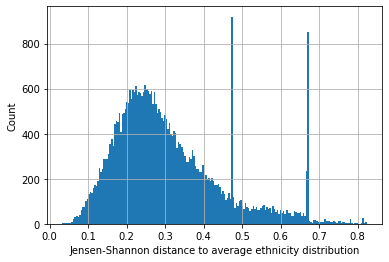

In [360]:
ethn = ethnicity[(ethnicity.efalevel == 'All students total')].set_index('unitid')
ethn.loc[:,'other'] = ethn[['ef2mort',"efunknt","efunknt"]].sum(axis=1)

data_ethn = ethn[['efaiant','efasiat','efbkaat','efhispt','efnhpit','efwhitt','other']].div(ethn['eftotlt'], axis=0)
overall_ethn = np.array(data_ethn.mean())

def JSD(b):
    a = overall_ethn
    b = np.array(b, dtype=np.float)
    _M = 0.5 * (a + b)
    return distance.jensenshannon(a,b)


data_ethn['kl_distance'] = data_ethn.apply(lambda x: JSD(np.array(x)), axis=1)
data_ethn['kl_distance'] = data_ethn['kl_distance'].apply(lambda x: 10 if x==np.inf else x)
plt.figure()
data_ethn['kl_distance'].hist(bins=200).plot(color='r')
plt.xlabel('Jensen-Shannon distance to average ethnicity distribution')
plt.ylabel('Count')

In [93]:
grad_data = pd.read_csv(r'C:\Users\Vincelot\Documents\Citadel_Datathon_Finals\IPEDS_Dataset_Encoded\Graduation Rates\GR_2015-2021_data.csv', sep=',')

In [115]:
#grad_2021 = grad_data[grad_data.year == 2021]
#grad_2021 = grad_data
#grad_num_2021 = grad_2021.groupby('unitid').sum()['grtotlt']
#grad_num_2021

In [100]:
len(set(grad_num_2021.index).intersection(set(ethn.unitid)))

3685

In [88]:
completions_data = pd.read_csv(r'C:\Users\Vincelot\Documents\Citadel_Datathon_Finals\IPEDS_Dataset_Encoded\Completions\C_A_2015-2021_data.csv', sep=',')

In [126]:

grad_completion = pd.DataFrame(completions_data[completions_data.year == 2021].groupby('unitid').sum().ctotalt).reset_index()

In [127]:
tot_student_2017 = ethn[['unitid','eftotlt']]
data_grad_rate = grad_completion.merge(tot_student_2017, on='unitid')
data_grad_rate['approx_grad_rate'] = data_grad_rate['ctotalt']/data_grad_rate['eftotlt']
data_grad_rate#['approx_grad_rate']

,unitid,ctotalt,eftotlt,approx_grad_rate
0,100654,1642,6001,0.273621
1,100663,12646,20902,0.605014
2,100690,434,675,0.642963
3,100706,4666,9101,0.512691
4,100724,1304,4760,0.273950
...,...,...,...,...
5748,491233,66,16,4.125000
5749,491242,72,57,1.263158
5750,491288,250,501,0.499002
5751,491297,12,5,2.400000


omawdp4    34.0
dtype: float64


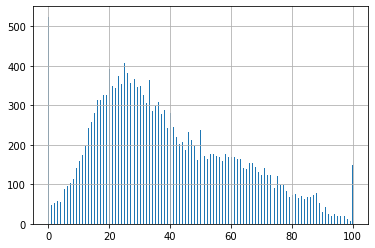

In [201]:
undergrad_compl = pd.read_csv(r'C:\Users\Vincelot\Documents\Citadel_Datathon_Finals\IPEDS_Dataset_Encoded\Outcome Measures\OM_2015-2021_data.csv', sep=',')
#data_compl = undergrad_compl[(undergrad_compl.omchrt == 'First-time, full-time entering, Total') & (undergrad_compl.year == 2021)]
#data_compl['approx_rate'] = data_compl[[x.lower() for x in ['OMCERT4','OMASSC4','OMBACH4','OMAWDN4']]].sum(axis=1)/data_compl['omrchrt']
data_compl = undergrad_compl[(undergrad_compl.omchrt == 'First-time, full-time entering, Total')]
data_compl['OMAWDP4'.lower()].hist(bins=300).plot(c='r')
print(data_compl[['OMAWDP4'.lower()]].median())
#data_compl['OMAWDP4'.lower()].hist(bins=200).plot()



In [183]:
#data_ethn['list_ethn'] = data_ethn.apply(lambda x: list(x), axis=1)
rel_ethn_completion = data_ethn.merge(data_compl[['unitid','OMAWDP4'.lower()]].set_index('unitid'), on='unitid')
rel_ethn_completion = rel_ethn_completion.reset_index().groupby('unitid').mean()
X = rel_ethn_completion[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit','efwhitt', 'other']]
y=rel_ethn_completion['omawdp4']

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.05371717979449453

In [153]:
adm_data = pd.read_csv(r'C:\Users\Vincelot\Documents\Citadel_Datathon_Finals\IPEDS_Dataset_Encoded\Admission and Test Scores\ADM_2015-2021_data.csv', sep=',')

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

0.8363416585533664


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


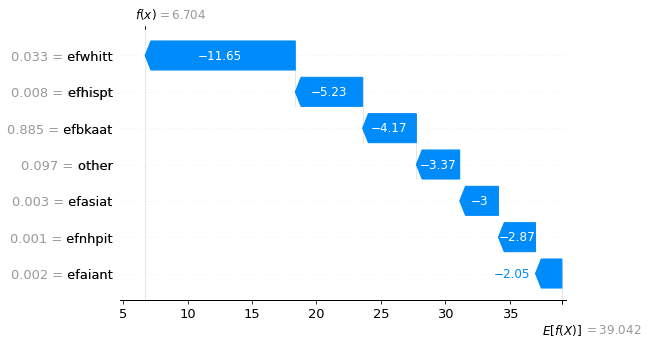

In [195]:
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)
print(model.score(X,y))
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

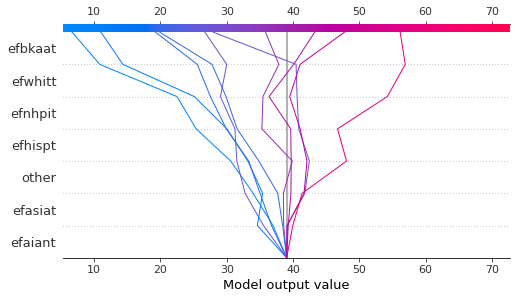

In [197]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns))

In [269]:
# Tutition fees
# GPA

fees_money_school = pd.read_csv(r'C:\Users\Vincelot\Documents\Citadel_Datathon_Finals\IPEDS_Dataset_Encoded\Institutional Finances\F_F2_1415-1920_data.csv', sep=',')
fees_money_school[['f2d01','unitid']].groupby('unitid').mean()
#y = np.array(fees_money_school['f2d01'].sort_values().cumsum())/fees_money_school['f2d01'].sum()
#plt.plot(np.linspace(fees_money_school['f2d01'].min(),fees_money_school['f2d01'].max(),len(y)),y,c='r')
#plt.show()




,f2d01
unitid,
100690,7.365773e+06
100937,1.391152e+07
101073,2.727705e+06
101189,3.440194e+07
101365,7.459146e+06
...,...
495280,2.716200e+04
495314,6.893088e+06
495767,1.739282e+09


In [271]:
data_without_gpa = rel_ethn_completion.groupby('unitid').first().merge(fees_money_school[['f2d01','unitid']].groupby('unitid').mean(), on='unitid')

#sorted_fees = np.array(fees_money_school['f201'].sort_values())

stats_df = data_without_gpa.reset_index() \
.groupby('f2d01') \
['f2d01'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'f2d01': 'frequency'})
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])
stats_df['cdf'] = stats_df['pdf'].cumsum()

dico_fee = stats_df['cdf'].to_dict()
data_without_gpa['cdf_fee'] = data_without_gpa['f2d01'].map(dico_fee)

data_without_gpa

    

,efaiant,efasiat,efbkaat,efhispt,efnhpit,efwhitt,other,kl_distance,omawdp4,f2d01,cdf_fee
unitid,,,,,,,,,,,
100690,0.002334,0.004584,0.439620,0.014845,0.002473,0.258412,0.552461,0.413498,41.6,7.365773e+06,0.332440
100937,0.005209,0.037445,0.128224,0.025553,0.000000,0.785661,0.012541,0.276829,59.0,1.391152e+07,0.469839
101073,0.000000,0.000684,0.919829,0.013478,0.000000,0.034059,0.000000,0.602184,1.0,2.727705e+06,0.197051
101189,0.006158,0.007520,0.413070,0.023536,0.002738,0.491281,0.059137,0.259607,16.8,3.440194e+07,0.680295
101365,0.003711,0.002825,0.577366,0.023394,0.002293,0.310626,0.122652,0.333159,49.8,7.459146e+06,0.336461
...,...,...,...,...,...,...,...,...,...,...,...
493798,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.472110,94.0,1.344227e+06,0.126676
494685,0.022534,0.016558,0.051173,0.159613,0.000000,0.690610,0.057893,0.190477,11.0,2.103659e+06,0.166220
495147,0.000000,0.025000,0.000000,0.375000,0.000000,0.525000,0.000000,0.364900,33.5,1.720920e+05,0.016086


[]

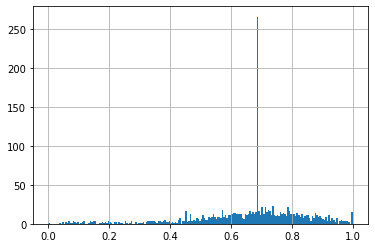

In [285]:
# level approx. admission rate

adm_data = pd.read_csv(r'C:\Users\Vincelot\Documents\Citadel_Datathon_Finals\IPEDS_Dataset_Encoded\Admission and Test Scores\ADM_2015-2021_data.csv',sep=',')
nb_appl = pd.DataFrame(adm_data.groupby('unitid').sum()['applcn'])['applcn']
nb_adm = pd.DataFrame(adm_data.groupby('unitid').sum()['admssn'])['admssn']
adm_rate = nb_adm/nb_appl
adm_rate_dico = adm_rate.to_dict()

data_with_level = data_without_gpa.reset_index()
data_with_level['level'] = data_with_level['unitid'].map(adm_rate_dico)
data_with_level = data_with_level.fillna(data_with_level['level'].median())
data_with_level['omawdp4'] /=100
data_with_level['level'].hist(bins=200).plot()

#/adm_data.groupby('unitid').sum()['admssn']
#adm_data['adm_rate']



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[]

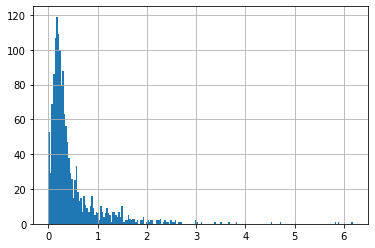

In [291]:
#compute school quality

df_final = data_with_level[['kl_distance','omawdp4','cdf_fee','level']]
df_final['school_quality'] = (df_final['kl_distance']*df_final['omawdp4'])/(df_final['cdf_fee']*df_final['level'])
df_final['school_quality'].apply(lambda x: np.log(1+x)).hist(bins=200).plot()

In [292]:
## Optimal policy to improve the average efficiency of the post_secondary system

#parameter calibration

In [293]:
df_final

,kl_distance,omawdp4,cdf_fee,level,school_quality
0,0.413498,0.416,0.332440,0.689388,0.750568
1,0.276829,0.590,0.469839,0.562805,0.617671
2,0.602184,0.010,0.197051,0.379170,0.080597
3,0.259607,0.168,0.680295,0.580446,0.110450
4,0.333159,0.498,0.336461,0.902500,0.546385
...,...,...,...,...,...
1487,0.472110,0.940,0.126676,0.691108,5.069118
1488,0.190477,0.110,0.166220,0.791822,0.159193
1489,0.364900,0.335,0.016086,0.689388,11.023323
1490,0.740821,0.345,0.003351,0.689388,110.628641


In [295]:
data_with_level.columns

Index(['unitid', 'efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other', 'kl_distance', 'omawdp4', 'f2d01', 'cdf_fee',
       'level'],
      dtype='object')

0.9387462482805959


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


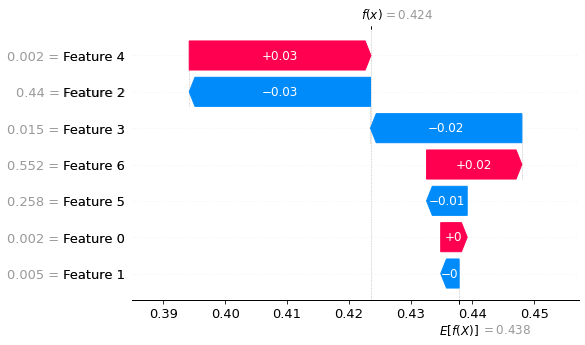

In [334]:
model_grad_rate = xgb.XGBRegressor(objective="reg:squarederror") 

model_grad_rate.fit(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other']]), np.array(data_with_level['omawdp4']))

print(model_grad_rate.score(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other']]), np.array(data_with_level['omawdp4'])))

explainer = shap.Explainer(model_grad_rate)

shap_values = explainer(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other']]))
shap.plots.waterfall(shap_values[0])

0.9664498140584208


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


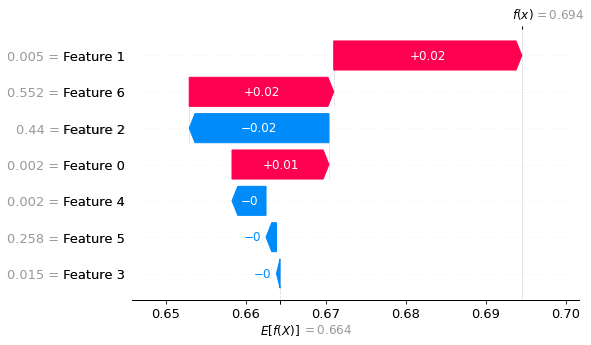

In [318]:
model_level = xgb.XGBRegressor(objective="reg:squarederror") 

model_level.fit(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other']]), np.array(data_with_level['level']))

print(model_level.score(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other']]), np.array(data_with_level['level'])))

explainer = shap.Explainer(model_level)

shap_values = explainer(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other']]))

shap.plots.waterfall(shap_values[0])

<Figure size 432x288 with 0 Axes>

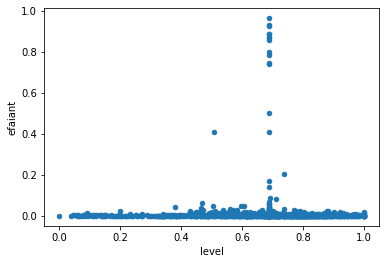

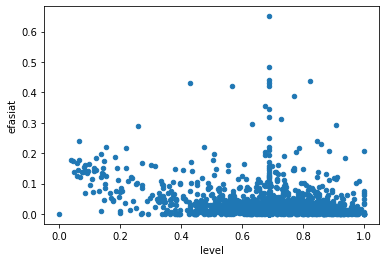

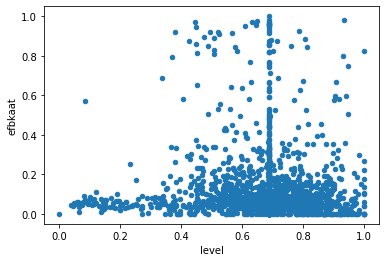

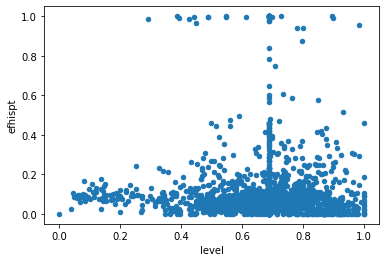

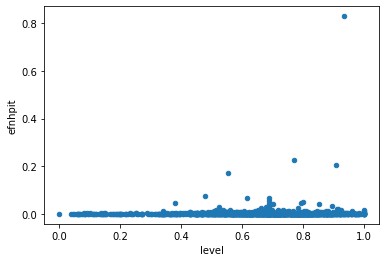

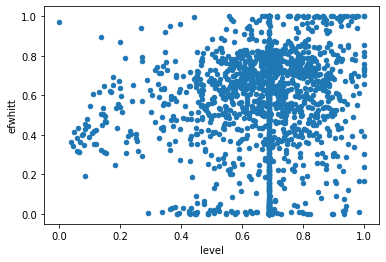

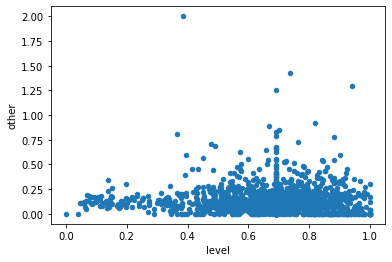

In [307]:
plt.figure()
for ethnicity in ['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit',
       'efwhitt', 'other']:
    data_with_level.plot.scatter(y=ethnicity,x="level")
plt.show()

In [364]:
# function to optimize
 #n_row = len(data_with_level)
#data_param = data_with_level.copy()
list_schools = np.array(data_with_level['unitid'])
dico_school_cdf_fee = data_with_level[['unitid','cdf_fee']].set_index('unitid').to_dict()['cdf_fee']


def parametric_institution_quality_school(school, p):
    diversity_score = JSD(p)
    graduation_rate = model_grad_rate.predict([p])[0]
    fee_cdf = dico_school_cdf_fee[school]
    admission_rate = model_level.predict([p])[0]
    return (diversity_score*graduation_rate)/(fee_cdf*admission_rate)

def parametric_institution_quality(p_list):
    res = 0
    for i in range(len(list_schools)):
        res+=parametric_institution_quality_school(list_schools[i], p_list[i])
    return 1/len(p_list)*res

import time
start = time.time()
parametric_institution_quality(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit','efwhitt', 'other']]))
print(time.time()-start)    

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


12.922711849212646


In [377]:
def parametric_institution_quality(p_list):
    df = data_with_level.copy()
    df[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit','efwhitt', 'other']]=p_list
    df['school_quality']=df[['unitid','efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit','efwhitt', 'other']].apply(
    lambda x: parametric_institution_quality_school(x[0],[x[i] for i in range(1,8)]), axis=1)
    #x[0],[x[i] for i in range(1,8)])
    return df['school_quality'].mean()

def param_quality(p):
    p_list = p.reshape(len(data_with_level),7)
    return -parametric_institution_quality(p_list)

#import time
#start = time.time()
#parametric_institution_quality(np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit','efwhitt', 'other']]))
#print(time.time()-start)


cons = ({'type': 'eq',
         'fun' : lambda x: x[7*i+1]+x[7*i+2]+x[7*i+3]+x[7*i+4]+x[7*i+5]+x[7*i+6] - 1
        } for i in range(len(data_with_level)))


initial_guess = np.ndarray.flatten(
    np.array(data_with_level[['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit','efwhitt', 'other']])
                                    )

In [378]:
param_quality(initial_guess)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


-1.8808288323028248

In [ ]:
from scipy.optimize import minimize

opt_ethn_prop = minimize(param_quality, initial_guess, constraints = cons, options={'maxiter':5})

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
print(opt_ethn_prop)